In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import cycler
import matplotlib as mpl
from wandb import Api

In [3]:
plt.style.use(["tableau-colorblind10", "seaborn-talk"])

In [12]:
dense_exp_runs = [
    "zc-emu-not-dense-v1-offline",
    "zc-emu-gsc-prior-precpd-simple-v2-offline",
    "zc-emu-using-dense-v1-offline",
    "zc-emu-not-dense-v1-online",
    "zc-emu-gsc-prior-precpd-simple-v2-online",
    "zc-emu-using-dense-v1-online",
]

rh_runs = [
    "zcemu-monthly-init-rh-in-m01-30d-v1-online",
    "zcemu-monthly-init-rh-in-m02-30d-v1-online",
    "zcemu-monthly-init-rh-in-m03-30d-v1-online",
    "zcemu-monthly-init-rh-in-m04-30d-v1-online",
    "zcemu-monthly-init-rh-in-m05-30d-v1-online",
    "zcemu-monthly-init-rh-in-m06-30d-v2-online",
    "zcemu-monthly-init-rh-in-m07-30d-v1-online",
    "zcemu-monthly-init-rh-in-m08-30d-v1-online",
    "zcemu-monthly-init-rh-in-m09-30d-v1-online",
    "zcemu-monthly-init-rh-in-m10-30d-v1-online",
    "zcemu-monthly-init-rh-in-m11-30d-v1-online",
    "zcemu-monthly-init-rh-in-m12-30d-v1-online",
]

seed5_runs = [
    "zc-emu-monthly-seed5-m01-30d-v1-online",
    "zc-emu-monthly-seed5-m02-30d-v1-online",
    "zc-emu-monthly-seed5-m03-30d-v1-online",
    "zc-emu-monthly-seed5-m04-30d-v1-online",
    "zc-emu-monthly-seed5-m05-30d-v1-online",
    "zc-emu-monthly-seed5-m06-30d-v1-online",
    "zc-emu-monthly-seed5-m07-30d-v1-online",
    "zc-emu-monthly-seed5-m08-30d-v1-online",
    "zc-emu-monthly-seed5-m09-30d-v1-online",
    "zc-emu-monthly-seed5-m10-30d-v1-online",
    "zc-emu-monthly-seed5-m11-30d-v1-online",
    "zc-emu-monthly-seed5-m12-30d-v1-online",
    "zc-emu-monthly-seed5-m01-30d-v1-offline",
    "zc-emu-monthly-seed5-m02-30d-v1-offline",
    "zc-emu-monthly-seed5-m03-30d-v1-offline",
    "zc-emu-monthly-seed5-m04-30d-v1-offline",
    "zc-emu-monthly-seed5-m05-30d-v1-offline",
    "zc-emu-monthly-seed5-m06-30d-v1-offline",
    "zc-emu-monthly-seed5-m07-30d-v1-offline",
    "zc-emu-monthly-seed5-m08-30d-v1-offline",
    "zc-emu-monthly-seed5-m09-30d-v1-offline",
    "zc-emu-monthly-seed5-m10-30d-v1-offline",
    "zc-emu-monthly-seed5-m11-30d-v1-offline",
    "zc-emu-monthly-seed5-m12-30d-v1-offline",
]

precip_runs = [
    "zc-emu-precip-strict-conserve-v1-online",
    "zc-emu-precip-simple-conserve-v1-online",
    "zc-emu-precip-no-conserve-v1-online"
]

seeded_runs = [
    "zc-emu-seed1-prognostic-30d-v2-online",
    "zc-emu-seed2-prognostic-30d-v2-online",
    "zc-emu-seed3-prognostic-30d-v2-online",
    "zc-emu-seed4-prognostic-30d-v2-online",
    "zc-emu-seed5-prognostic-30d-v2-online",
    "zc-emu-seed1-prognostic-30d-v2-offline",
    "zc-emu-seed2-prognostic-30d-v2-offline",
    "zc-emu-seed3-prognostic-30d-v2-offline",
    "zc-emu-seed4-prognostic-30d-v2-offline",
    "zc-emu-seed5-prognostic-30d-v2-offline",
]

gscond_seeds = [
    "zc-emu-normfix-seed0-prognostic-30d-v1-online",
    "zc-emu-normfix-seed1-prognostic-30d-v1-online",
    "zc-emu-normfix-seed2-prognostic-30d-v1-online",
    "zc-emu-normfix-seed3-prognostic-30d-v1-online",
    "zc-emu-normfix-seed4-prognostic-30d-v1-online",
    "zc-emu-monthly-normfix-m06-30d-v1-online",
]

phase_dep = [
    "zc-emu-temp-in-adjust-phase-dep-gscond-30d-v3-online",
    "zc-emu-temp-in-adjust-phase-dep-gscond-30d-v3-offline"
]

classifier_runs = [
    "zc-emu-no-gscond-classify-v2-online",
]

all_runs = dense_exp_runs + seeded_runs + rh_runs + seed5_runs + gscond_seeds + precip_runs + phase_dep + classifier_runs

In [5]:
api = Api()

def _get_run_summary(group):
    runs = api.runs(
        "ai2cm/microphysics-emulation",
        filters={"group": {"$regex": group}},
    )

    summary_stats = {}
    for run in runs:
        summary_stats.update(run.summary)

    return summary_stats
        


In [6]:
summary = _get_run_summary(all_runs[0])

In [7]:
skill_keys = [key for key in summary.keys() if "column_skill" in key]

In [8]:
columns = sorted(skill_keys)
columns.insert(2, columns[-2])
columns.insert(3, columns[-1])
columns = columns[:-2]

In [9]:

columns = [
    'column_skill/air_temperature',
    'column_skill/cloud_water',
    'column_skill/specific_humidity',
    'column_skill/surface_precipitation',
    'column_skill/gscond/air_temperature',
    'column_skill/gscond/cloud_water',
    'column_skill/gscond/specific_humidity',
    'column_skill/precpd/air_temperature',
    'column_skill/precpd/cloud_water',
    'column_skill/precpd/specific_humidity',
    "tropical_average_temp_near_tropopause_5d_k",
    "antarctic_avg_column_integrated_cloud_5d_kg",
    'drifts/air_temperature/10day',
    'drifts/cloud_water_mixing_ratio/10day',
    'drifts/specific_humidity/10day',
]


In [10]:
def _get_summary_df(group):
    summary = _get_run_summary(group)
    summary = {col_name: summary.get(col_name, None) for col_name in columns}
    return pd.DataFrame(summary, index=[group])

In [13]:
all_dfs = [_get_summary_df(group) for group in all_runs]
all_run_data = pd.concat(all_dfs)



In [12]:
all_run_data.to_csv("metrics.csv")

In [27]:
seed_ensemble = all_run_data.filter(regex="zc-emu-[^m]*seed[\w-]*online", axis=0)

In [28]:
def get_seed_num_from_name(row):
    name = row.name
    pattern = re.compile(r"seed(\d)")
    return pattern.search(name).group(1)

In [30]:
seed_ensemble["seed"] = seed_ensemble.apply(get_seed_num_from_name, axis=1)

<ipython-input-30-f4b6c0fbc6e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seed_ensemble["seed"] = seed_ensemble.apply(get_seed_num_from_name, axis=1)


In [31]:
use_cols = [
    'column_skill/air_temperature',
    'column_skill/specific_humidity',
    'column_skill/cloud_water',
    'column_skill/surface_precipitation'
]

In [32]:
reduced = seed_ensemble.set_index("seed")[use_cols].transpose()

In [33]:
offline_init = all_run_data[use_cols].filter(regex="rh-in.*offline", axis=0).mean(axis=0)
online_init = all_run_data[use_cols].filter(regex="rh-in.*online", axis=0).mean(axis=0)
seed5_inits_avg = all_run_data[use_cols].filter(regex="zc-emu-monthly-seed[\w-]*online", axis=0).mean(axis=0)

In [36]:
unfixed_seed5 = all_run_data.loc["zc-emu-monthly-seed5-m06-30d-v1-online"][use_cols]

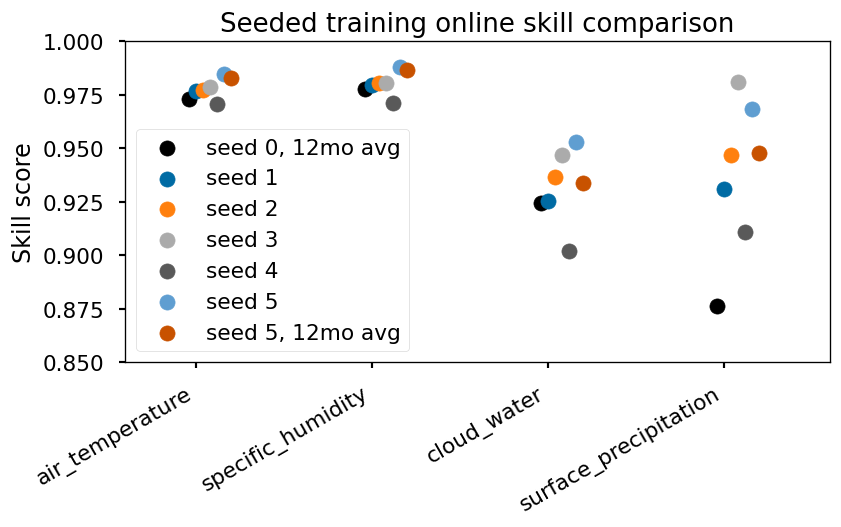

In [20]:
fix, ax = plt.subplots(dpi=120, figsize=(7,4.5))
colors = iter(plt.rcParams["axes.prop_cycle"])
x = np.arange(len(online_init)) * 1.25
plt.scatter(x-0.05, online_init.values, c="k", label="seed 0, 12mo avg")
for i, (skill_name, series) in enumerate(reduced.items()):
    values = series.values
    c = next(colors)
    x_jitter = x + i * 0.05
    plt.scatter(x=x_jitter, y=values, c=c["color"], label=f"seed {i+1}")
plt.scatter(x + (i + 1) * 0.05, y=seed5_inits_avg.values, c=next(colors)["color"], label="seed 5, 12mo avg")
labels = [l.replace("column_skill/", "") for l in series.index]
plt.xticks(ticks=x, labels=labels, rotation=30, ha="right")
ax.set_xlim(-0.5, 4.5)
ax.set_ylim(0.85, 1)
plt.title("Seeded training online skill comparison")
plt.ylabel("Skill score")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

In [16]:
gscond_seed_data = all_run_data.loc[gscond_seeds]
gscond_seed_data["seed"] = list(range(len(gscond_seeds)))

In [23]:
gsc_data = gscond_seed_data.set_index("seed")[use_cols].transpose()

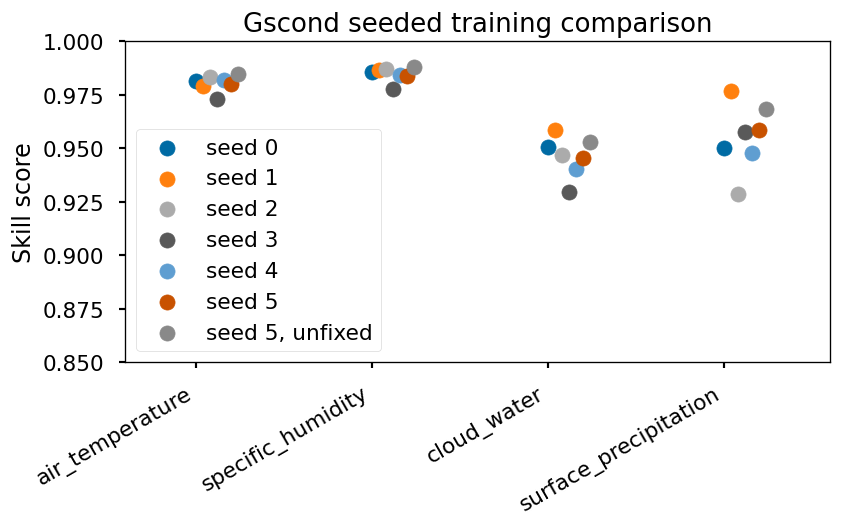

In [38]:
fix, ax = plt.subplots(dpi=120, figsize=(7,4.5))
colors = iter(plt.rcParams["axes.prop_cycle"])
x = np.arange(len(online_init)) * 1.25

for i, (skill_name, series) in enumerate(gsc_data.items()):
    values = series.values
    c = next(colors)
    x_jitter = x + i * 0.05
    plt.scatter(x=x_jitter, y=values, c=c["color"], label=f"seed {i}")
plt.scatter(x + (i + 1) * 0.05, y=unfixed_seed5.values, c=next(colors)["color"], label="seed 5, unfixed")
labels = [l.replace("column_skill/", "") for l in series.index]
plt.xticks(ticks=x, labels=labels, rotation=30, ha="right")
ax.set_xlim(-0.5, 4.5)
ax.set_ylim(0.85, 1)
plt.title("Gscond seeded training comparison")
plt.ylabel("Skill score")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

## Online skill across months

In [12]:
rh_inits = all_run_data.filter(regex="zcemu.*online", axis=0)

In [13]:
seed5_inits = all_run_data.filter(regex="zc-emu-monthly-seed[\w-]*online", axis=0)
seed5_inits_offline = all_run_data.filter(regex="zc-emu-monthly-seed[\w-]*offline", axis=0)

In [14]:
[c["color"] for c in iter(plt.rcParams["axes.prop_cycle"])][0:4]

['#006BA4', '#FF800E', '#ABABAB', '#595959']

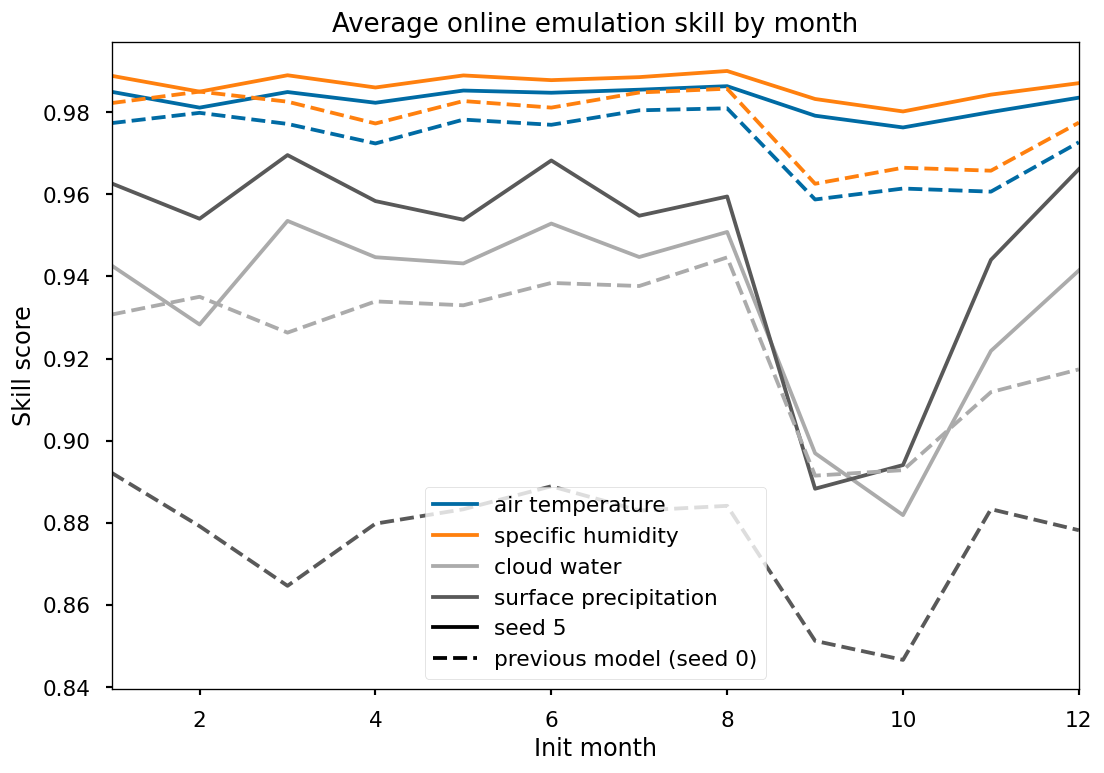

In [62]:
fig, ax = plt.subplots(dpi=120)
seed5_inits.set_axis(range(1,13))[use_cols].plot.line(ax=ax, color=['#006BA4', '#FF800E', '#ABABAB', '#595959'])
rh_inits.set_axis(range(1,13))[use_cols].plot.line(ax=ax, color=['#006BA4', '#FF800E', '#ABABAB', '#595959'], linestyle="--")
plt.title("Average online emulation skill by month")
plt.ylabel("Skill score")
plt.xlabel("Init month")
plt.xlim(1,12)
ax = plt.gca()
h, l = ax.get_legend_handles_labels()
h = h[0:4]
h.extend([Line2D([0], [0], color="k"), Line2D([0], [0], color="k", linestyle="--")])
l = ["air temperature", "specific humidity", "cloud water", "surface precipitation", "seed 5", "previous model (seed 0)"]
plt.legend(h, l)
plt.show()

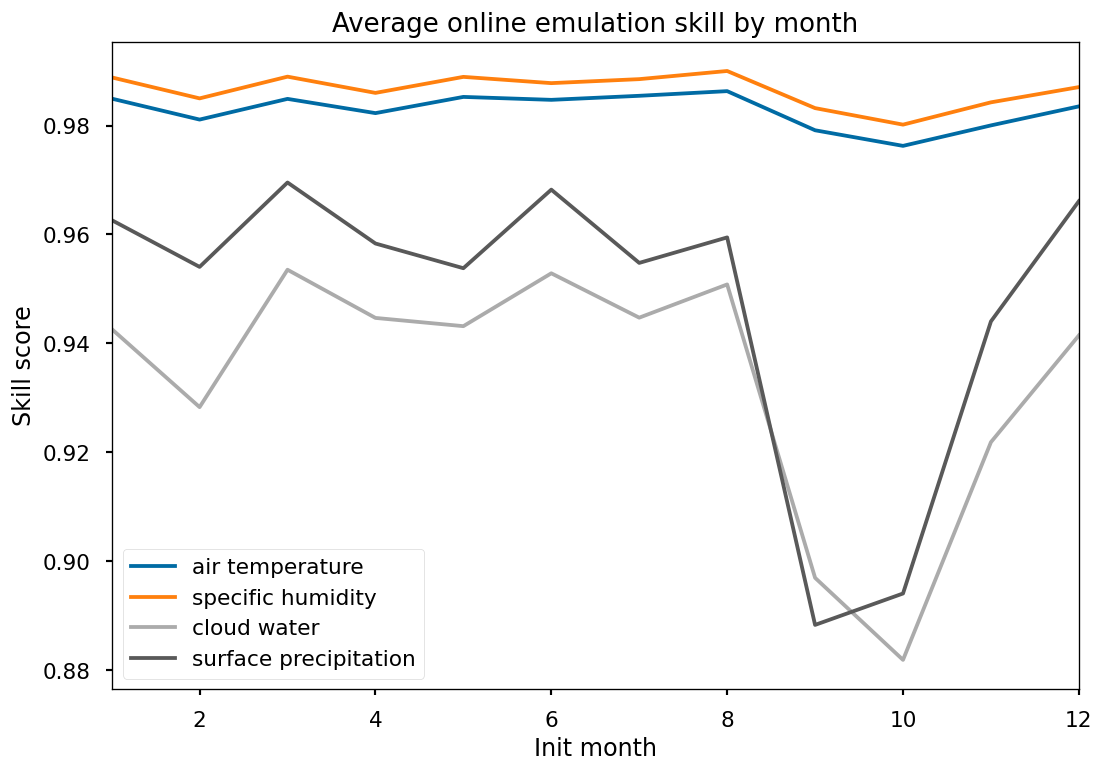

In [63]:
fig, ax = plt.subplots(dpi=120)
seed5_inits.set_axis(range(1,13))[use_cols].plot.line(ax=ax, color=['#006BA4', '#FF800E', '#ABABAB', '#595959'])
# seed5_inits_offline.set_axis(range(1,13))[use_cols].plot.line(ax=ax, color=['#006BA4', '#FF800E', '#ABABAB', '#595959'], linestyle="--")
plt.title("Average online emulation skill by month")
plt.ylabel("Skill score")
plt.xlabel("Init month")
plt.xlim(1,12)
plt.legend(labels=["air temperature", "specific humidity", "cloud water", "surface precipitation"])
plt.show()

## Check classifier usage skill scores

In [25]:
compare_runs = [
    'zc-emu-monthly-seed5-m06-30d-v1-online',
    'zc-emu-no-gscond-classify-v2-online',
    'zc-emu-monthly-seed5-m06-30d-v1-offline'
]

In [26]:
all_run_data.loc[compare_runs]

,column_skill/air_temperature,column_skill/cloud_water,column_skill/specific_humidity,column_skill/surface_precipitation,column_skill/gscond/air_temperature,column_skill/gscond/cloud_water,column_skill/gscond/specific_humidity,column_skill/precpd/air_temperature,column_skill/precpd/cloud_water,column_skill/precpd/specific_humidity,tropical_average_temp_near_tropopause_5d_k,antarctic_avg_column_integrated_cloud_5d_kg,drifts/air_temperature/10day,drifts/cloud_water_mixing_ratio/10day,drifts/specific_humidity/10day
zc-emu-monthly-seed5-m06-30d-v1-online,0.984727,0.952876,0.987797,0.968236,0.985354,0.988424,0.988424,0.967697,0.909715,0.969468,206.181304,0.086456,-0.011457,-2.201456e-08,8.603120e-07
zc-emu-no-gscond-classify-v2-online,0.926453,0.877205,0.929440,0.963577,0.923277,0.926140,0.926140,0.968901,0.896206,0.970515,206.109290,0.088204,-0.011169,3.445058e-08,8.773248e-07
zc-emu-monthly-seed5-m06-30d-v1-offline,0.991259,0.986872,0.994925,0.998387,0.991160,0.995006,0.995006,0.990381,0.985964,0.989332,206.139705,0.078687,NaN,NaN,NaN


In [31]:
pd.DataFrame({
    "offline": seed5_inits_offline[use_cols].mean(axis=0),
    "online": seed5_inits[use_cols].mean(axis=0),
}).transpose().round(3)

,column_skill/air_temperature,column_skill/specific_humidity,column_skill/cloud_water,column_skill/surface_precipitation
offline,0.991,0.995,0.986,0.998
online,0.983,0.987,0.934,0.948
